In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
from glob import glob
from datetime import datetime
import sys
import itertools

from spicy_snow.retrieval import retrieval_from_parameters

In [2]:
lidar_ds = xr.open_dataset(Path('~/scratch/spicy/SnowEx-Data-params/Banner_2021-03-15.nc'))

In [6]:
optimal_a = 1.1
optimal_b = 2.0
optimal_c = 0.39
new_ds = retrieval_from_parameters(lidar_ds, A = optimal_a, B = optimal_b, C = optimal_c, wet_SI_thresh = 0, freezing_snow_thresh = 1, wet_snow_thres = -2)

In [11]:
lidar_ds.attrs['param_A']

1.4

In [9]:
new_ds.to_netcdf('~/Banner_2021-03-15.nc')

(array([1.000000e+00, 1.670000e+02, 1.531900e+04, 2.441990e+05,
        1.797421e+06, 3.305800e+05, 8.683100e+04, 5.173000e+03,
        4.000000e+01, 5.000000e+00]),
 array([-2.72632976, -2.09335728, -1.4603848 , -0.82741232, -0.19443984,
         0.43853264,  1.07150511,  1.70447759,  2.33745007,  2.97042255,
         3.60339503]),
 <BarContainer object of 10 artists>)

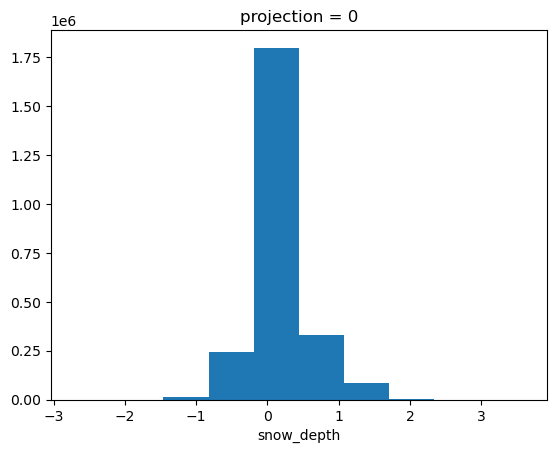

In [7]:
(new_ds['snow_depth']-lidar_ds['snow_depth']).plot()

In [74]:
optimal_a = 1.1
optimal_b = 2.0
optimal_c = 0.39

dataset = xr.open_dataset(f).load() # Open dataset 
td = abs(pd.to_datetime(dataset.time) - pd.to_datetime(lidar_ds.attrs['lidar-flight-time']))
closest_ts_idx = np.where(td == td.min())[0][0]
closest_ts = lidar_ds.time[closest_ts_idx]

ds_optimal, lidar_optimal = calc_snowdepth(dataset, optimal_a, optimal_b, optimal_c, closest_ts,lidar_ds)
ds_a25down, lidar_a25down = calc_snowdepth(dataset, optimal_a-optimal_a*0.25, optimal_b, optimal_c, closest_ts,lidar_ds)
ds_a25up, lidar_a25up = calc_snowdepth(dataset, optimal_a+optimal_a*0.25, optimal_b, optimal_c, closest_ts,lidar_ds)
    
ds_b25down, lidar_b25down = calc_snowdepth(dataset, optimal_a, optimal_b-optimal_b*0.25, optimal_c, closest_ts,lidar_ds)
ds_b25up, lidar_b25up = calc_snowdepth(dataset, optimal_a, optimal_b+optimal_b*0.25, optimal_c, closest_ts,lidar_ds)
    
ds_c25down, lidar_c25down = calc_snowdepth(dataset, optimal_a, optimal_b, optimal_c-optimal_c*0.25, closest_ts,lidar_ds)
ds_c25up, lidar_c25up = calc_snowdepth(dataset, optimal_a, optimal_b, optimal_c+optimal_c*0.25, closest_ts,lidar_ds)

hans = lidar_ds.snow_depth.where(lidar_optimal>=0).sel(time=closest_ts, method = 'nearest') #2.5, 0.2, 0.55
h2,_ = calc_snowdepth(dataset, 2, 0.5, 0.44, closest_ts,lidar_ds)

Text(0.5, 1.0, 'A = 1.1, B = 2.0')

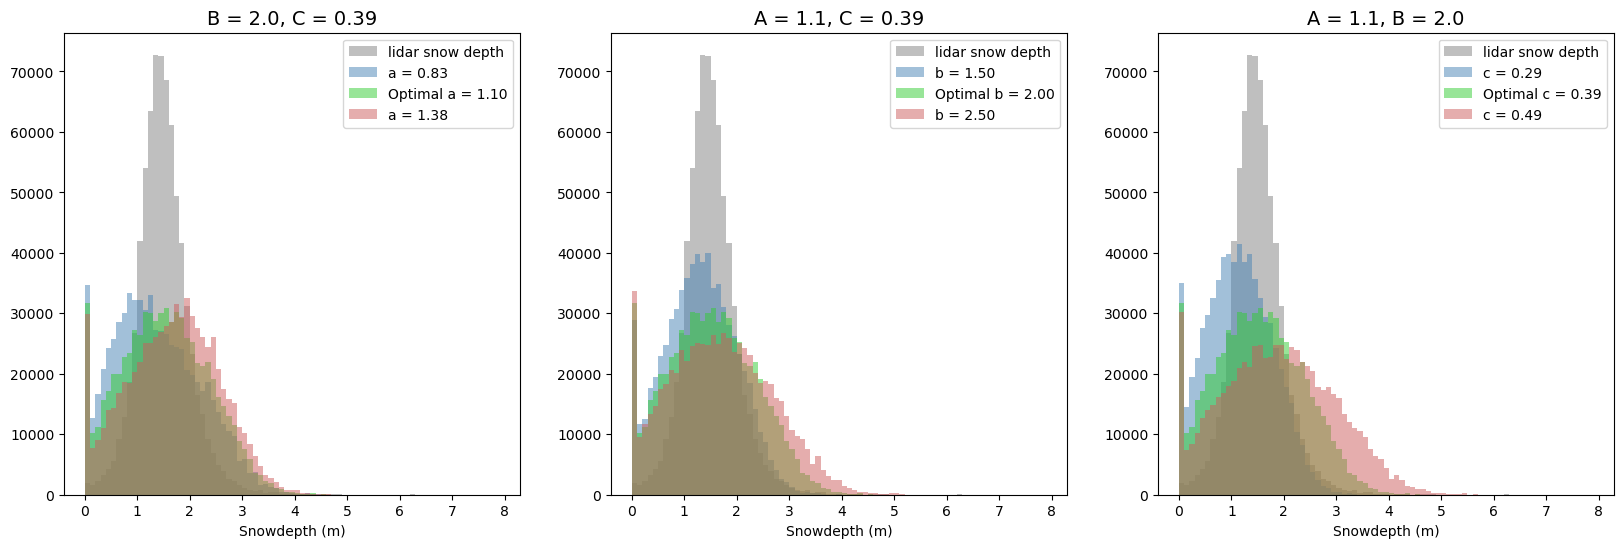

In [75]:
fig, ax = plt.subplots(1,3,figsize = (20,6))

bins = np.arange(0,8,0.1)
ax[0].hist(lidar_optimal.values.flatten(), bins, alpha = 0.25, color = 'black', label = 'lidar snow depth')
# ax[0].hist(hans.values.flatten(), bins, alpha = 0.5, color = 'yellow', label = 'Hans S1 snow depth')
# ax[0].hist(h2.values.flatten(), bins, alpha = 0.5, color = 'orange', label = 'Hans S1 snow depth')
ax[0].hist(ds_a25down.values.flatten(), bins, alpha = 0.5, color = 'steelblue', label = f'a = {optimal_a-0.25*optimal_a:0.2f}')
ax[0].hist(ds_optimal.values.flatten(), bins, alpha = 0.5, color = 'limegreen', label = f'Optimal a = {optimal_a:0.2f}')
ax[0].hist(ds_a25up.values.flatten(), bins, alpha = 0.5, color = 'indianred', label = f'a = {optimal_a+0.25*optimal_a:0.2f}')
ax[0].set_xlabel('Snowdepth (m)')
ax[0].legend()
ax[0].set_title(f'B = {optimal_b}, C = {optimal_c}', fontsize = 14)

ax[1].hist(lidar_optimal.values.flatten(), bins, alpha = 0.25, color = 'black', label = 'lidar snow depth')
ax[1].hist(ds_b25down.values.flatten(), bins, alpha = 0.5, color = 'steelblue', label = f'b = {optimal_b-0.25*optimal_b:0.2f}')
ax[1].hist(ds_optimal.values.flatten(), bins, alpha = 0.5, color = 'limegreen', label = f'Optimal b = {optimal_b:0.2f}')
ax[1].hist(ds_b25up.values.flatten(), bins, alpha = 0.5, color = 'indianred', label = f'b = {optimal_b+0.25*optimal_b:0.2f}')
ax[1].set_xlabel('Snowdepth (m)')
ax[1].legend()
ax[1].set_title(f'A = {optimal_a}, C = {optimal_c}', fontsize = 14)

ax[2].hist(lidar_optimal.values.flatten(), bins, alpha = 0.25, color = 'black', label = 'lidar snow depth')
ax[2].hist(ds_c25down.values.flatten(), bins, alpha = 0.5, color = 'steelblue', label = f'c = {optimal_c-0.25*optimal_c:0.2f}')
ax[2].hist(ds_optimal.values.flatten(), bins, alpha = 0.5, color = 'limegreen', label = f'Optimal c = {optimal_c:0.2f}')
ax[2].hist(ds_c25up.values.flatten(), bins, alpha = 0.5, color = 'indianred', label = f'c = {optimal_c+0.25*optimal_c:0.2f}')
ax[2].set_xlabel('Snowdepth (m)')
ax[2].legend()
ax[2].set_title(f'A = {optimal_a}, B = {optimal_b}', fontsize = 14)